In [1]:
import torch
import torch.nn as nn


dim = 128
time_dim = dim * 4  

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time):
        device = time.device
        half_dim = self.dim // 2
        scale = torch.log(torch.tensor(10000.0)) / (half_dim - 1)
        frequencies = torch.exp(torch.arange(half_dim, device=device) * -scale)
        angles = time[:, None] * frequencies[None, :]
        embeddings = torch.cat((angles.sin(), angles.cos()), dim=-1)
        return embeddings

class TimeMLP(nn.Module):
    def __init__(self, input_dim, time_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, time_dim), 
            nn.GELU(),
            nn.Linear(time_dim, time_dim)     
        )
    def forward(self, x):
        return self.net(x)

pos_embed = SinusoidalPositionEmbeddings(dim)
time_mlp = TimeMLP(dim, time_dim)
# generate random time values of size (batchsize, 1)
times = torch.randint(0, 100, (32, 1)).float()

pos_embs = pos_embed(times)

mlp_outputs = time_mlp(pos_embs)




In [2]:
times.shape

torch.Size([32, 1])

In [3]:
torch.arange(100)


tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
        90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [4]:
times.shape

torch.Size([32, 1])

In [5]:
pos_embs[0]

tensor([[ 0.8601,  0.9973, -0.4466,  0.7523, -0.6228, -0.9063, -0.6280,  0.5388,
          0.5970, -0.9511,  0.9784, -0.8556,  0.3043,  0.6728, -0.8780, -0.4852,
          0.7474,  0.9046,  0.1217, -0.6810, -0.9976, -0.8357, -0.4146,  0.0579,
          0.4594,  0.7444,  0.9139,  0.9891,  0.9963,  0.9588,  0.8949,  0.8178,
          0.7361,  0.6554,  0.5790,  0.5086,  0.4448,  0.3878,  0.3374,  0.2929,
          0.2541,  0.2201,  0.1906,  0.1649,  0.1426,  0.1234,  0.1066,  0.0922,
          0.0797,  0.0689,  0.0595,  0.0514,  0.0444,  0.0384,  0.0332,  0.0287,
          0.0248,  0.0214,  0.0185,  0.0160,  0.0138,  0.0119,  0.0103,  0.0089,
          0.5102,  0.0740, -0.8948,  0.6588,  0.7824,  0.4227,  0.7782,  0.8424,
         -0.8023,  0.3089, -0.2067,  0.5176, -0.9526,  0.7398,  0.4787, -0.8744,
         -0.6643,  0.4263,  0.9926,  0.7323,  0.0689, -0.5492, -0.9100, -0.9983,
         -0.8882, -0.6677, -0.4060, -0.1470,  0.0861,  0.2841,  0.4463,  0.5756,
          0.6769,  0.7553,  

In [6]:
mlp_outputs,mlp_outputs.shape

(tensor([[[ 0.2282, -0.0298,  0.0146,  ..., -0.0227, -0.0601,  0.2950]],
 
         [[ 0.3020, -0.0785, -0.0287,  ...,  0.0491, -0.1309,  0.1175]],
 
         [[ 0.2758, -0.0470, -0.0114,  ...,  0.0103, -0.1089,  0.1241]],
 
         ...,
 
         [[ 0.3238, -0.1350, -0.1460,  ...,  0.0901, -0.0428,  0.0547]],
 
         [[ 0.1565, -0.0329,  0.0867,  ...,  0.0432, -0.1101,  0.1429]],
 
         [[ 0.1936, -0.1951,  0.1355,  ...,  0.0028, -0.0056,  0.2353]]],
        grad_fn=<ViewBackward0>),
 torch.Size([32, 1, 512]))

In [7]:
128//3

42

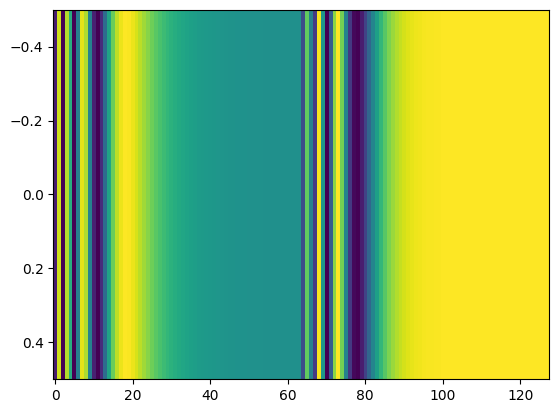

In [8]:
import matplotlib.pyplot as plt
plt.imshow(pos_embs[2].detach().numpy(), aspect='auto')
plt.show()


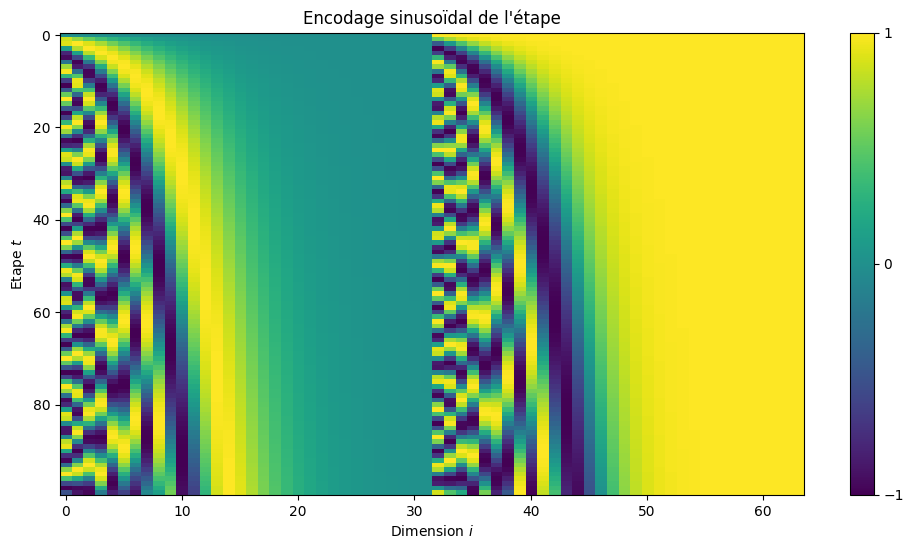

In [10]:
# Define parameters
dim = 64  # Number of dimensions for embeddings
num_timesteps = 100  # Number of time steps

# Generate time steps
time = torch.linspace(0, num_timesteps, num_timesteps)

# Generate embeddings
embedding_layer = SinusoidalPositionEmbeddings(dim)
embeddings = embedding_layer(time).detach().numpy()  

# Plot the heatmap
plt.figure(figsize=(12, 6))
plt.imshow(embeddings, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(ticks=(embeddings.min(),0.00,1.00))
plt.ylabel("Etape $t$")
plt.xlabel("Dimension $i$")
plt.title("Encodage sinusoïdal de l'étape")
plt.show()

In [13]:
embeddings.shape

(64, 1000)

In [ ]:
batch_size = 128
H, W = 28, 28

In [23]:
42*3

126

In [21]:
dim = 28
init_dim = (dim // 3) * 2
dim_mults = [1, 2, 4]

dims = [init_dim, *map(lambda m: dim * m, dim_mults)] # l=[dim, dim*1, dim*2, dim*4, dim*8]
in_out = list(zip(dims[:-1], dims[1:]))

In [22]:
init_dim

18

In [23]:
dims

[18, 28, 56, 112]

In [24]:
in_out

[(18, 28), (28, 56), (56, 112)]

In [25]:
len(in_out)

3

In [19]:
import torch
import torch.nn as nn

x= torch.randn(128,28,28,28)
a=nn.Conv2d(28, 28, 4, 2, 1)
y=a(x)
y=a(y)
y.shape



torch.Size([128, 28, 7, 7])

In [29]:
for ind, (dim_in, dim_out) in enumerate(in_out):
    print(ind, dim_in, dim_out)

0 18 28
1 28 56
2 56 112


In [30]:
for  ind , (dim_in, dim_out) in enumerate(reversed(in_out[1:])):
    print(dim_in, dim_out)

56 112
28 56


In [3]:
import torch
b , c , h, w = 32, 3, 224, 224
x= torch.randn(b,c,h,w) 
y= torch.randn(b,c,h,w)

t=torch.cat((x, y), dim=1)
t.shape

torch.Size([32, 6, 224, 224])

In [30]:
num_resolutions = len(in_out) # number of resolutions = 4

downs = nn.ModuleList([]) # ModuleList permet de stocker des modules
for ind, (dim_in, dim_out) in enumerate(in_out):
            is_last = ind >= (num_resolutions - 1)

            downs.append(# on aura 
                nn.ModuleList(
                    [
                        TimeMLP(dim_in, dim_out),
                    ]
                )
            )
downs

ModuleList(
  (0): ModuleList(
    (0): TimeMLP(
      (net): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=128, out_features=128, bias=True)
      )
    )
  )
  (1): ModuleList(
    (0): TimeMLP(
      (net): Sequential(
        (0): Linear(in_features=128, out_features=256, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=256, out_features=256, bias=True)
      )
    )
  )
  (2): ModuleList(
    (0): TimeMLP(
      (net): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=512, out_features=512, bias=True)
      )
    )
  )
  (3): ModuleList(
    (0): TimeMLP(
      (net): Sequential(
        (0): Linear(in_features=512, out_features=1024, bias=True)
        (1): GELU(approximate='none')
        (2): Linear(in_features=1024, out_features=1024, bias=True)
   

In [31]:
dims[-1]

1024

In [79]:
import torch
import torch.nn as nn
from torch import einsum
from einops import rearrange  # Install via: pip install einops

# Standard Multi-Head Attention
class Attention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        self.scale = dim_head ** -0.5
        self.heads = heads
        hidden_dim = heads * dim_head
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)
        self.to_out = nn.Conv2d(hidden_dim, dim, 1)
        
    def forward(self, x):
        B, C, H, W = x.shape
        # Project and split into Q, K, V
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) x y -> b h c (x y)', h=self.heads), qkv)
        # Scale queries
        q = q * self.scale
        # Compute similarity (full dot-product attention)
        sim = einsum('b h d i, b h d j -> b h i j', q, k)
        sim = sim - sim.amax(dim=-1, keepdim=True).detach()  # Stability trick
        attn = sim.softmax(dim=-1)
        # Weighted sum of values
        out = einsum('b h i j, b h d j -> b h i d', attn, v)
        out = rearrange(out, 'b h (x y) d -> b (h d) x y', x=H, y=W)
        return self.to_out(out)

# Linear Attention
class LinearAttention(nn.Module):
    def __init__(self, dim, heads=4, dim_head=32):
        super().__init__()
        self.scale = dim_head ** -0.5
        self.heads = heads
        hidden_dim = heads * dim_head
        self.to_qkv = nn.Conv2d(dim, hidden_dim * 3, 1, bias=False)
        self.to_out = nn.Sequential(
            nn.Conv2d(hidden_dim, dim, 1),
            nn.GroupNorm(1, dim)
        )
    
    def forward(self, x):
        B, C, H, W = x.shape
        # Project and split into Q, K, V
        qkv = self.to_qkv(x).chunk(3, dim=1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) x y -> b h c (x y)', h=self.heads), qkv)
        # Apply softmax separately:
        q = q.softmax(dim=-2) * self.scale   # Normalize over channel dimension (dim_head)
        k = k.softmax(dim=-1)                # Normalize over spatial dimension (N)
        # Compute context matrix from K and V
        context = torch.einsum('b h d n, b h e n -> b h d e', k, v)
        # Compute output by combining context with Q
        out = torch.einsum('b h d e, b h d n -> b h e n', context, q)
        out = rearrange(out, 'b h c (x y) -> b (h c) x y', x=H, y=W)
        return self.to_out(out)



In [80]:
B, C, H, W = 128, 18, 28, 28  # Batch size 2, 64 channels, 16x16 spatial dimensions
x = torch.randn(B, C, H, W)

attn_std = Attention(dim=C, heads=4, dim_head=32)
attn_linear = LinearAttention(dim=C, heads=4, dim_head=32)

output_std = attn_std(x)
output_linear = attn_linear(x)

print("Standard Attention Output Shape:", output_std.shape)
print("Linear Attention Output Shape:", output_linear.shape)

difference = torch.abs(output_std - output_linear)
print( difference)


Standard Attention Output Shape: torch.Size([128, 18, 28, 28])
Linear Attention Output Shape: torch.Size([128, 18, 28, 28])
tensor([[[[0.2280, 0.2341, 0.1692,  ..., 0.2172, 0.1698, 0.1840],
          [0.1966, 0.1510, 0.1701,  ..., 0.2181, 0.1702, 0.1260],
          [0.1703, 0.2006, 0.1856,  ..., 0.2497, 0.1702, 0.1899],
          ...,
          [0.1803, 0.1906, 0.2129,  ..., 0.1374, 0.2535, 0.2025],
          [0.2508, 0.2001, 0.2135,  ..., 0.1966, 0.2265, 0.2117],
          [0.1645, 0.2010, 0.2003,  ..., 0.1801, 0.2459, 0.1977]],

         [[1.1910, 1.2418, 1.2554,  ..., 1.2081, 1.2729, 1.2374],
          [1.2244, 1.2702, 1.2013,  ..., 1.2001, 1.2639, 1.2385],
          [1.2335, 1.1765, 1.2499,  ..., 1.2006, 1.2461, 1.2033],
          ...,
          [1.1461, 1.1898, 1.2076,  ..., 1.2446, 1.2393, 1.2035],
          [1.1794, 1.2535, 1.2056,  ..., 1.2676, 1.1869, 1.2326],
          [1.2147, 1.2127, 1.2844,  ..., 1.2699, 1.2077, 1.1982]],

         [[1.0317, 1.0505, 1.0223,  ..., 1.0301, 0

In [89]:
# taille de l'input
B, C, H, W = 128, 1, 28, 28  # Batch size 2, 64 channels, 16x16 spatial dimensions

image_size = 28
channels = 1
batch_size = 128
dim = image_size
init_dim = dim // 3 * 2
x = torch.randn(B, C, H, W)
init_dim , x.shape

(18, torch.Size([128, 1, 28, 28]))

In [90]:
# augmenté le nombre de channels avec une convolutions 

init_conv = nn.Conv2d(channels, init_dim, 7, padding=3)

x = init_conv(x)
x.shape


torch.Size([128, 18, 28, 28])

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from einops import rearrange


B, C, H, W = 128, 18, 28, 28
x = torch.randn(B, C, H, W)
heads = 4


dim_head = 32
hidden_dim = dim_head * heads
out_channels = 3 * hidden_dim 
conv1x1 = nn.Conv2d(in_channels=C, out_channels=out_channels, kernel_size=1, bias=False)


y = conv1x1(x) 
qkv = y.chunk(3, dim=1)
q, k, v = map(lambda t: rearrange(t, 'b (h c) x y -> b h c (x y)', h=heads), qkv)




y.shape, q.shape, k.shape, v.shape

(torch.Size([128, 384, 28, 28]),
 torch.Size([128, 4, 32, 784]),
 torch.Size([128, 4, 32, 784]),
 torch.Size([128, 4, 32, 784]))

In [93]:
sim = einsum('b h d i, b h d j -> b h i j', q, k)
sim = sim - sim.amax(dim=-1, keepdim=True).detach()  # Stability trick
attn = sim.softmax(dim=-1)
# Weighted sum of values
out1 = einsum('b h i j, b h d j -> b h i d', attn, v)
out = rearrange(out1, 'b h (x y) d -> b (h d) x y', x=H, y=W)
out.shape, attn.shape, out1.shape

(torch.Size([128, 128, 28, 28]),
 torch.Size([128, 4, 784, 784]),
 torch.Size([128, 4, 784, 32]))

In [91]:
hidden_dim, dim

(128, 28)

In [73]:
# difference entre les valeurs de q, k
torch.abs(q - k)


tensor([[[[7.1231e-01, 1.1385e+00, 5.4407e-01,  ..., 6.4361e-01,
           1.3929e-01, 1.4565e+00],
          [5.2721e-01, 2.6499e-01, 1.2576e-01,  ..., 1.3589e+00,
           1.6859e+00, 3.5426e-01],
          [1.3727e+00, 5.4195e-01, 4.5821e-01,  ..., 1.7260e+00,
           9.4427e-01, 7.3191e-01],
          ...,
          [4.3186e-02, 1.9990e-01, 7.7102e-01,  ..., 4.6871e-01,
           5.4250e-01, 9.9135e-01],
          [7.6164e-01, 1.1857e+00, 4.0886e-01,  ..., 8.3796e-01,
           1.8764e-02, 3.4617e-01],
          [1.6941e-01, 1.5775e-01, 8.3270e-02,  ..., 3.3155e-01,
           4.9054e-01, 1.2119e+00]],

         [[7.6880e-01, 1.0981e+00, 7.8359e-01,  ..., 6.9356e-01,
           1.1674e+00, 6.1306e-01],
          [6.1290e-01, 4.3826e-02, 9.2076e-01,  ..., 2.0358e+00,
           1.2699e+00, 3.0106e-02],
          [5.0567e-01, 6.4702e-01, 1.4658e-01,  ..., 2.3060e-01,
           2.2083e-01, 3.6165e-01],
          ...,
          [6.8555e-01, 8.3493e-01, 2.8069e-01,  ..., 1.8241

In [96]:
q = q.softmax(dim=-2)    
k = k.softmax(dim=-1) 
context = torch.einsum('b h d n, b h e n -> b h d e', k, v)
out2 = torch.einsum('b h d e, b h d n -> b h e n', context, q)
out = rearrange(out2, 'b h c (x y) -> b (h c) x y', x=H, y=W)
q.shape, k.shape, context.shape, out2.shape

(torch.Size([128, 4, 32, 784]),
 torch.Size([128, 4, 32, 784]),
 torch.Size([128, 4, 32, 32]),
 torch.Size([128, 4, 32, 784]))

In [99]:
timesteps = 100
steps = timesteps + 1
x = torch.linspace(0, timesteps, steps)
x.shape

torch.Size([101])

In [ ]:
import math
from torch import nn

class SinusoidalPositionEmbeddings(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dim = dim

    def forward(self, time, verbose=False):
        device = time.device
        half_dim = self.dim // 2
        if verbose:
            print(f"half_dim: {half_dim}")
        # 10000 is the constant used also in "Attention is all you need", Vaswani et al. (2017)
        # Why this one is unclear
        embeddings = math.log(10000) / (half_dim - 1)
        if verbose:
            print(f"1 - embeddings: {embeddings}")
        embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
        if verbose:
            print(f"2 - embeddings: {embeddings.shape, embeddings}")
        embeddings = time[:, None] * embeddings[None, :]
        if verbose:
            print(f"3 - embeddings: {embeddings.shape, embeddings}")
        embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)
        if verbose:
            print(f"4 - embeddings: {embeddings.shape, embeddings}")
        return embeddings

In [ ]:
spe = SinusoidalPositionEmbeddings(512)
time = torch.tensor([19,25])
spe.forward(time, True)